# 4.10: Coding Etiquette & Excel Reporting
** **

###  Contents:

1. Importing libraries and files


2. Considering security implications


3. Comparing customer behavior in different geographic areas
    - 3.1 Creating a regional segmentation of the data
    - 3.2 Spending habits of Instacart customers within the U.S. regions


4. Creating an exclusion flag for low-activity customers (customers with less than 5 orders) and excluding them from the data. 
    - 4.1 Excluding low-activity customers from the data and export the subset. 
    - 4.2 Excluding high-activity customers from the data and export the subset. 


5. Customer profiling
    - 5.1 Demographic market segmentation
         
        - 5.1.1 Segmentation by IC customer's age
        - 5.1.2 Segmentation based on IC customer's number of dependents & relationship
        - 5.1.3 Segmentation by IC customer's income
        - 5.1.4 Segmentation by department      
        
    - 5.2 Behavoiral market segmentation   

       - 5.2.1 Non-alocohol drinker customers
       - 5.2.2 Pet owner customers
       - 5.2.3 Vegetarian customers
       - 5.2.4 Parents with babies
       - 5.2.5 Early birds vs night owls


6. Customer profile visualization

7. Customer profile aggregation for usage frequency and expenditure

8. Customer profile comparison in regions and departments

9. Exporting updated dataframes and charts
    - 9.1 Exporting dataframes
    - 9.2 Exporting charts
    

## 1. Importing libraries and files
** **

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [3]:
# Setting shared path
path=r'C:\\Users\\Admin\\05-01-2023 Instacart Basket Analysis'

In [4]:
# Importing the recent mereged dataset (orders, products and customers dataframes- From task 4-9)

df_ords_prods_custm = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [5]:
# Importing departments Dataframe

depts_df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 2. Considering security implications
** **

### Sensitive data (PII) addressing

The '*first_name*' and '*last_name*' columns within our dataset could potentially be traced back to a particular person and needs to be addressed.

**How to address:**
Dropping these two columns in compliance to customer privacy and letting the stakeholders know by providing notes in the reports.

In [6]:
# Checkpoint of DataFrame Dimension
df_ords_prods_custm.shape

(3189714, 34)

In [7]:
# Exploring the columns
df_ords_prods_custm.dtypes

order_id                     int64
user_id                      int32
eval_set                    object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                      object
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
exists                    category
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_price              float64
spending_flag               object
median_prior_orders        float64
order_frequency_flag        object
first_name                  object
last_name                   object
gender                      object
state               

In [8]:
# Exploring data in dataset

df_ords_prods_custm.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
# Dropping PII information 
df_ords_prods_custm = df_ords_prods_custm.drop(columns = ['first_name','last_name'])

In [10]:
# Checking dataset to assure PII is removed from data

df_ords_prods_custm.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3. Comparing customer behavior in different geographic areas
** **

In [11]:
# Checking state column

df_ords_prods_custm['state'].value_counts(dropna = False)

Alabama                 73806
California              72150
Rhode Island            68818
South Carolina          68750
Virginia                67431
Louisiana               67062
Michigan                66335
District of Columbia    66195
Indiana                 66140
New York                65520
Alaska                  65145
Massachusetts           65034
Minnesota               65007
Washington              64858
Tennessee               64497
Connecticut             64362
Kansas                  64014
North Carolina          63900
North Dakota            63698
New Hampshire           63241
New Mexico              63218
South Dakota            63028
Arizona                 62915
Oregon                  62785
Missouri                62454
Wyoming                 62248
Pennsylvania            62211
Maine                   61693
Vermont                 61673
Maryland                61665
New Jersey              61591
Oklahoma                61317
Iowa                    61214
Arkansas  

### 3.1 Creating a regional segmentation of the data

In [12]:
# Defining region lists

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Assigning region lists' values to a new column (region)

df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(region_1_NE), 'region'] = 'Northeast'
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(region_2_MW), 'region'] = 'Midwest'
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(region_3_S), 'region'] = 'South'
df_ords_prods_custm.loc[df_ords_prods_custm['state'].isin(region_4_W), 'region'] = 'West'

In [14]:
#  Checking region values

df_ords_prods_custm['region'].value_counts(dropna = False)

South        1061403
West          812140
Midwest       742028
Northeast     574143
Name: region, dtype: int64

In [15]:
# Checking DataFrame Dimension after adding a new colum

df_ords_prods_custm.shape

(3189714, 33)

### 3.2 Spending habits of Instacart customers within the U.S. regions

In [21]:
# Creating a spending_habits crosstab

crosstab_spending_habits = pd.crosstab (merged_df_ords_prods_custm['spending_flag'], merged_df_ords_prods_custm['region'], dropna = False)

NameError: name 'merged_df_ords_prods_custm' is not defined

In [ ]:
crosstab_spending_habits

##  4. Creating an exclusion flag for low-activity customers (with less than 5 orders) 
** **

In [17]:
# Creating activity_flag based on the number of orders

df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] <5, 'activity_flag'] = 'Low activity'
df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] >=5, 'activity_flag'] = 'High activity'
df_ords_prods_custm.tail(10)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag
3189704,878799,11534,prior,3,2,6,8.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189705,3315464,11534,prior,4,1,10,6.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189706,2698828,11534,prior,5,1,13,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189707,917560,11534,prior,6,1,13,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189708,490079,11534,prior,7,2,6,8.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189709,2371958,11534,prior,8,4,12,2.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189710,2462548,11534,prior,9,1,8,4.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189711,1367873,11534,prior,10,1,10,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189712,2376815,11534,prior,11,1,9,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189713,774135,11534,prior,12,1,13,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity


In [18]:
# Checking new added column

df_ords_prods_custm['activity_flag'].value_counts(dropna = False)

High activity    3048665
Low activity      141049
Name: activity_flag, dtype: int64

In [20]:
merged_df_ords_prods_custm.dtypes

NameError: name 'merged_df_ords_prods_custm' is not defined

### 4.1 Excluding Low Activity customers from the data and export the subset. 

In [22]:
# Create a subset which excludes low_activity customers

high_activity_cxs = df_ords_prods_custm[df_ords_prods_custm['activity_flag'] == 'High activity']
high_activity_cxs.tail()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag
3189709,2371958,11534,prior,8,4,12,2.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189710,2462548,11534,prior,9,1,8,4.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189711,1367873,11534,prior,10,1,10,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189712,2376815,11534,prior,11,1,9,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity
3189713,774135,11534,prior,12,1,13,7.0,42387,1,1,...,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity


#Moved to section 9 ---> Export high_activity_cxs in .pkl format

#high_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cxs_orders.pkl'))

### 4.2 Excluding high-activity customers from the data and export the subset. 

In [23]:
# Create a subset which excludes High_activity customers

low_activity_cxs = df_ords_prods_custm[df_ords_prods_custm['activity_flag'] == 'Low activity']
low_activity_cxs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag
1513,520620,120,prior,1,3,11,NaN,196,2,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1514,3273029,120,prior,3,2,8,19.0,196,2,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1515,520620,120,prior,1,3,11,NaN,46149,1,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1516,3273029,120,prior,3,2,8,19.0,46149,1,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1517,520620,120,prior,1,3,11,NaN,26348,3,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity


In [ ]:
# Moved to section 9 ---> Export low_activity_cxs in .pkl format 
# low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

## 5. Customer profiling
** **

### 5.1 Demographic market segmentation

#### 5.1.1 Segmentation based on IC customer's age

We will be using 'high_activity_cxs' dataset to profile customers, since the Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.

In [24]:
#Catching warning messages

pd.options.mode.chained_assignment = None

In [25]:
# Start profiling high activity customers

cstmrs = high_activity_cxs

In [26]:
# Exploring descriptive statistics of 'age' column

cstmrs['age'].describe()

count    3.048665e+06
mean     4.941381e+01
std      1.856881e+01
min      1.800000e+01
25%      3.300000e+01
50%      5.000000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

**Result:**  The output of describe() function shows that 18 is the youngest age while age 81 is the oldest one within the data.

- Therefore, age groups will be calssifed as:
    - a) Youth         18 - 39
    - b) Middle Age    40 - 64
    - c) Seniors   65 and older

In [27]:
# Creating age categories

cstmrs.loc[(cstmrs['age'] >= 18) & (cstmrs['age'] < 40), 'age_category'] = 'Youth'
cstmrs.loc[(cstmrs['age'] >= 40) & (cstmrs['age'] < 65), 'age_category'] = 'Middle age'
cstmrs.loc[cstmrs['age'] >= 65, 'age_category'] = 'Senior'
cstmrs['age_category'].value_counts()

Middle age    1183521
Youth         1057208
Senior         807936
Name: age_category, dtype: int64

In [28]:
# Double checking the 'cstmrs' dataset to see the added column
cstmrs.shape

(3048665, 35)

#### 5.1.2 Segmentation based on IC customer's number of dependents & relationship

In [29]:
# Exploring 'no_of_dependents'
cstmrs['no_of_dependents'].describe()

count    3.048665e+06
mean     1.505592e+00
std      1.114710e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: no_of_dependents, dtype: float64

**Result:**  The output of describe() function on 'no_of_dependents' shows that 0 is the min while 3 is the largest number of dependents in a family.

- Therefore, family size groups will be calssifed as:
    - a) Small         0
    - b) Mid size    1-2
    - c) Large   3
    

In [30]:
# Creating family_size column 

cstmrs.loc[cstmrs['no_of_dependents'] == 0, 'family_size'] = 'Small'
cstmrs.loc[(cstmrs['no_of_dependents'] == 1) | (cstmrs['no_of_dependents'] == 2), 'family_size'] = 'Mid size'
cstmrs.loc[cstmrs['no_of_dependents'] > 2, 'family_size'] = 'Large'

In [31]:
cstmrs['family_size'].value_counts(dropna = False)

Mid size    1535599
Large        759699
Small        753367
Name: family_size, dtype: int64

In [32]:
#Exploring the connection of 'marital_status' and 'no_of_dependents'
family_crosstab = pd.crosstab(cstmrs['marital_status'],cstmrs['no_of_dependents'],dropna = False)

In [33]:
family_crosstab

no_of_dependents,0,1,2,3
marital_status,,,,
divorced/widowed,274994,0,0,0
living with parents and siblings,0,57007,47918,52809
married,0,703242,727432,706890
single,478373,0,0,0


In [34]:
cstmrs.loc[(cstmrs['marital_status'] == 'married') & (cstmrs['no_of_dependents'] == 1), 'household'] = 'Couple without children'
cstmrs.loc[(cstmrs['marital_status'] == 'married') & (cstmrs['no_of_dependents'] >= 2), 'household'] = 'Couple with children'
cstmrs.loc[(cstmrs['marital_status'] == 'divorced/widowed') | (cstmrs['marital_status'] == 'single'), 'household'] = 'One person'
cstmrs.loc[(cstmrs['marital_status'] == 'divorced/widowed') & (cstmrs['no_of_dependents'] > 0 ), 'household'] = 'Single parent'
cstmrs.loc[cstmrs['marital_status'] == 'living with parents and siblings', 'household'] = 'Other family'

In [35]:
# Checking new column (household)

cstmrs['household'].value_counts(dropna = False)

Couple with children       1434322
One person                  753367
Couple without children     703242
Other family                157734
Name: household, dtype: int64

In [36]:
# Confirming added column

cstmrs.shape

(3048665, 37)

#### 5.1.3 Segmentation by IC customer's income

In [37]:
# Exploring to categorize the income column

cstmrs['income'].describe()

count    3.048665e+06
mean     9.949482e+04
std      4.409957e+04
min      2.611600e+04
25%      6.647600e+04
50%      9.670000e+04
75%      1.273970e+05
max      5.768760e+05
Name: income, dtype: float64

**Result:**  The output of describe() function on 'income' determines that 25.9k USD is the lowest income whereas 593.9k USD is the highest income reported by IC families.

- Therefore, income catrgories will be calssifed as:
    - a) Low         < 70K USD
    - b) Middle      70K- 100K USD
    - c) Upper mid   100k-130K
    - d) High        > 130K

In [38]:
# Creating income_category column

cstmrs.loc[cstmrs['income']< 70000, 'income_category'] = 'Low'
cstmrs.loc[(cstmrs['income']>= 70000) & (cstmrs['income']< 100000), 'income_category'] = 'Middle'
cstmrs.loc[(cstmrs['income']>= 100000) & (cstmrs['income']< 130000), 'income_category'] = 'Upper mid'
cstmrs.loc[cstmrs['income']>= 130000, 'income_category'] = 'High'

In [39]:
# Checking income_category values

cstmrs['income_category'].value_counts(dropna = False)

Low          869021
Middle       783897
High         717869
Upper mid    677878
Name: income_category, dtype: int64

In [40]:
# Confirming the added column

cstmrs.shape

(3048665, 38)

#### 5.1.4 Segmentation by department

#### Note: 
As we don't have the department names in 'cstmrs' dataset, we need to use 'department' dataframe to map 'depatment_id's to department names.


In [41]:
# calling 'department' dataframe
depts_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [42]:
# Renaming index column to a clear naem

depts_df.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)

In [43]:
# Pairing the tupple of {'department_id' , 'department'} with zip() function to create a dictionary

dprt_map=dict(zip(depts_df["department_id"], depts_df["department"]))

In [44]:
dprt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [45]:
# Mapping customers to department df by the map() function and department dictionary(dprt_map)

cstmrs['department'] = cstmrs['department_id'].map(dprt_map)

In [46]:
# Confirming new added column

cstmrs.shape

(3048665, 39)

In [47]:
# Distribution of 'department' values in 'cstmrs' dataframe

cstmrs['department'].value_counts(dropna = False)

produce            895642
dairy eggs         507158
snacks             275262
beverages          251272
frozen             206267
pantry             175427
bakery             111589
deli                99814
canned goods        98991
dry goods pasta     80848
household           70620
breakfast           66558
meat seafood        66042
personal care       41990
babies              39383
international       25217
alcohol             13827
pets                 9764
missing              6178
bulk                 3418
other                3398
Name: department, dtype: int64

### 5.2 Behavoiral market segmentation

#### 5.2.1 Non-Alocohol drinker Customers

In [48]:
# Creating alcohol_drinker column

cstmrs.loc[cstmrs['department'] !='alcohol', 'alcohol_drinker'] = 'No'
cstmrs.loc[cstmrs['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [49]:
cstmrs['alcohol_drinker'].value_counts(dropna = False)

No     3034838
Yes      13827
Name: alcohol_drinker, dtype: int64

In [50]:
# Confirming new added column

cstmrs.shape

(3048665, 40)

#### 5.2.2 Pet owner customers

In [51]:
# Creating pet_owner column

cstmrs.loc[cstmrs['department'] == 'pets', 'pet_owner'] = 'Yes'
cstmrs.loc[cstmrs['department'] != 'pets', 'pet_owner'] = 'No'

In [52]:
cstmrs.shape

(3048665, 41)

In [53]:
cstmrs['pet_owner'].value_counts(dropna= False)

No     3038901
Yes       9764
Name: pet_owner, dtype: int64

#### 5.2.3 Vegetarian customers
       

In [54]:
#Creating a list to assign 'vegetarian' column's values. If a customer never purchased 'meat seafood' or deli, then we assume them a vegetarian.
result = []
for value in cstmrs['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        result.append('Yes')
    else:
        result.append('No')
result

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',


In [55]:
# Assigning 'result' list values to 'vegetarian' column

cstmrs['vegetarian'] = result

In [56]:
# Confirming 'vegetarian' column was added

cstmrs.shape

(3048665, 42)

In [57]:
# Investigating 'vegetarian' values in customers

cstmrs['vegetarian'].value_counts(dropna = False)

Yes    2882809
No      165856
Name: vegetarian, dtype: int64

#### 5.2.4 Parents with babies

In [58]:
# Creating 'parents_with_baby' column based on department

cstmrs.loc[cstmrs['department'] !='babies', 'parents_with_baby'] = 'No'
cstmrs.loc[cstmrs['department'] =='babies', 'parents_with_baby'] = 'Yes'

In [59]:
cstmrs.shape

(3048665, 43)

In [60]:
# Exploring new column : 'parents_with_baby'

cstmrs['parents_with_baby'].value_counts(dropna = False)

No     3009282
Yes      39383
Name: parents_with_baby, dtype: int64

#### 5.2.5 Early birds vs night owls

In [61]:
# Exploring the distribution of orders in 24 hours a day

cstmrs['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      18200
1       9766
2       5703
3       4267
4       5244
5       8337
6      27197
7      86673
8     162888
9     232250
10    259201
11    257400
12    248622
13    249794
14    250488
15    249781
16    235738
17    198992
18    153716
19    119100
20     92151
21     76152
22     60295
23     36710
Name: order_hour_of_day, dtype: int64

In [62]:
# Creating 'period_of_day' column based on order time

cstmrs.loc[cstmrs['order_hour_of_day'] <5 , 'order_time_habit'] = 'Night owl'
cstmrs.loc[(cstmrs['order_hour_of_day']>= 9) & (cstmrs['order_hour_of_day']<= 23), 'order_time_habit'] = 'Regular'
cstmrs.loc[(cstmrs['order_hour_of_day']>= 5) & (cstmrs['order_hour_of_day']< 9), 'order_time_habit'] = 'Early bird'

In [63]:
cstmrs['order_time_habit'].value_counts(dropna = False)

Regular       2720390
Early bird     285095
Night owl       43180
Name: order_time_habit, dtype: int64

### 6. Customer profile visualization

Text(0.5, 1.0, 'Alcohol-drinkers Distribution')

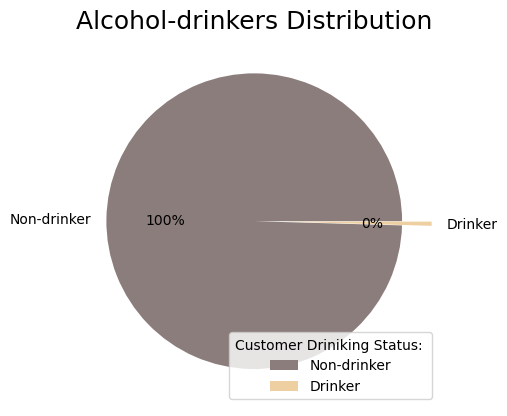

In [64]:
# Drwing a pie chart for alcohol drinking profiling

alcohol_drinker_pie = cstmrs['alcohol_drinker'].value_counts().plot.pie(labels = ['Non-drinker','Drinker'], autopct=('%1.f%%'), colors = ['#8B7D7B', '#EECFA1'], label = '', explode = [0,0.2])
alcohol_drinker_pie.legend(title = 'Customer Driniking Status: ', loc = 'lower right')
plt.title("Alcohol-drinkers Distribution", fontsize = '18')



Text(0.5, 1.0, 'Pet-owner Customers Distribution')

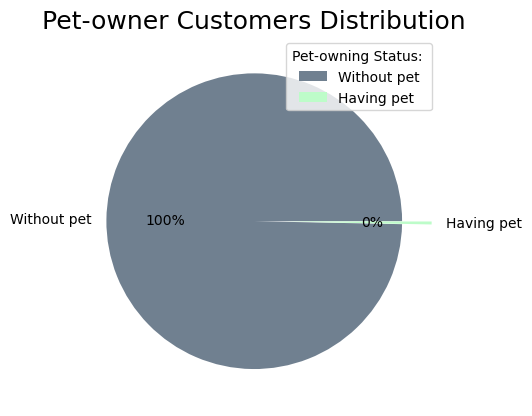

In [65]:
# Drawing a pie chart of pet owners for IC customers

pet_owner_pie = cstmrs['pet_owner'].value_counts().plot.pie(labels = ['Without pet','Having pet'], autopct=('%1.f%%'), colors = ['#708090','#BDFCC9'], label = '', explode = [0,0.2])
pet_owner_pie.legend(title = 'Pet-owning Status: ', loc = 'upper right')
plt.title( "Pet-owner Customers Distribution", fontsize= '18')

Text(0.5, 0, 'Order Habits')

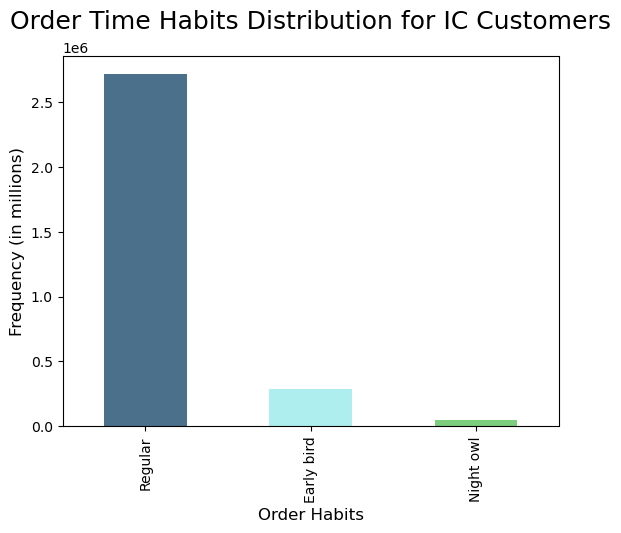

In [66]:
# Drawing a bar chart of 'order_time_habit' column

time_habit_bar = cstmrs['order_time_habit'].value_counts().plot.bar( color = ['#4A708B', '#AEEEEE', '#7CCD7C'])
plt.title('Order Time Habits Distribution for IC Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Order Habits',  fontsize = 12)


#### **Chart Observation:**
Over 80% of IC customers prefer to place their orders between 9am to 23pm, ie. not as an early bird nor night owl.

In [67]:
# Drawing a stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (cstmrs['region'],cstmrs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle,Upper mid
region,,,,
Midwest,174169,212677,175542,147856
Northeast,125800,146256,143222,132998
South,239079,292741,266469,215261
West,178821,217347,198664,181763


Text(0.5, 0, 'Region')

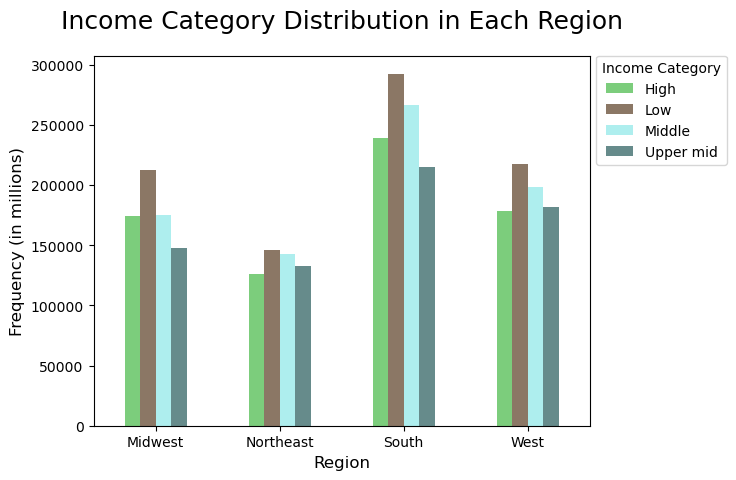

In [68]:
# Drawing a bar chart of income categorie in the US regions

bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['#7CCD7C', '#8B7765', '#AEEEEE', '#668B8B'])
# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category Distribution in Each Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

#### **Chart Observation:**
Low-income customers have the higest population between IC customers. We might help them by announcing promotions and discounts on products which are most poular items among their orders.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple with children'),
  Text(1, 0, 'One person'),
  Text(2, 0, 'Couple without children'),
  Text(3, 0, 'Other family')])

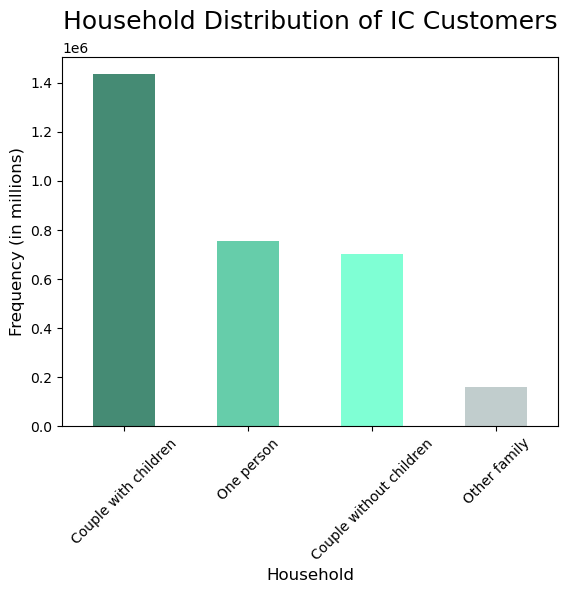

In [69]:
bar_household = cstmrs['household'].value_counts().plot.bar(color= ['#458B74', '#66CDAA', '#7FFFD4', '#C1CDCD'])
plt.title('Household Distribution of IC Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=45)

#### **Chart Observation:**

Couples with children have the higest population between IC households. This would impact the promotions and marketing campaigns.

### 7. Customer profile aggregation for usage frequency and expenditure


(-1.0, 22.0)

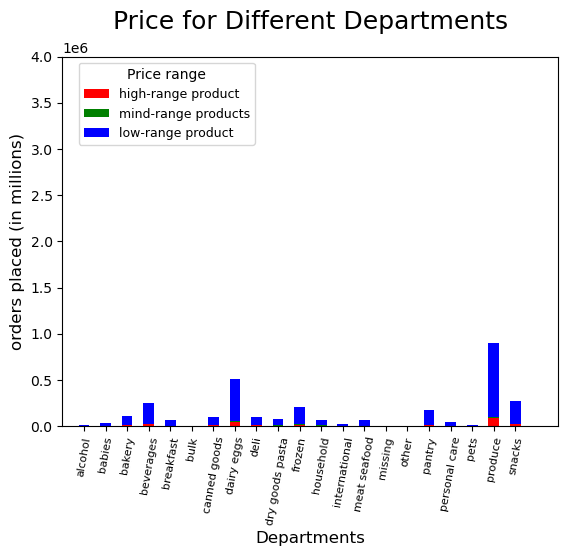

In [125]:
bar_hbt_dept = ct_hbt_dept.plot(kind = 'bar', stacked = True, color ='rgbwymc')
bar_hbt_dept.legend(title='Price range', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['high-range product','mind-range products', 'low-range product'], fontsize = 9)
plt.title('Price for Different Departments', fontsize = 18, pad=20)
plt.ylabel('orders placed (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Set the y axis limit to increase the axis length
plt.ylim(0, 4000000)
plt.xlim(-1, 22)

In [120]:
# Age category usage frequency aggregation

cstmrs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order        
                          mean min max
age_category                          
Middle age            8.327606   1  95
Senior                8.323942   1  80
Youth                 8.264080   1  89

In [73]:
# Region expenditure aggregation

cstmrs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    10.606483  1.0  99999.0
Northeast  11.691263  1.0  99999.0
South      10.723389  1.0  99999.0
West       12.004378  1.0  99999.0

In [74]:
# Region usage frequency aggregation

cstmrs.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order        
                       mean min max
region                             
Midwest            8.096339   1  78
Northeast          8.365819   1  79
South              8.338148   1  95
West               8.408084   1  89

In [75]:
# Household usage frequency aggregation

cstmrs.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                                     mean min max
household                                        
Couple with children             8.267706   1  95
Couple without children          8.289435   1  83
One person                       8.405932   1  92
Other family                     8.223820   1  89

In [76]:
# Income category expenditure aggregation

cstmrs.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_category                         
High             20.886164  1.0  99999.0
Low               7.365570  1.0     25.0
Middle            8.375671  1.0  99999.0
Upper mid         9.108472  1.0  99999.0

In [77]:
# Income category usage frequency aggregation

cstmrs.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                             mean min max
income_category                          
High                     8.370676   1  75
Low                      8.040748   1  89
Middle                   8.377136   1  95
Upper mid                8.489020   1  92

In [78]:
# Order-time habit with usage frequency aggregation

cstmrs.groupby('order_time_habit').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                              mean min max
order_time_habit                          
Early bird                8.469938   1  92
Night owl                 8.394975   1  68
Regular                   8.285844   1  95

In [79]:
# Order-time habit with expenditure aggregation

cstmrs.groupby('order_time_habit').agg({'prices' : ['mean', 'min', 'max']})

prices              
                       mean  min      max
order_time_habit                         
Early bird        11.200715  1.0  99999.0
Night owl         10.233937  1.0  14900.0
Regular           11.211367  1.0  99999.0

In [80]:
# Parents with babies in usage frequency aggregation

cstmrs.groupby('parents_with_baby').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                               mean min max
parents_with_baby                          
No                         8.272649   1  95
Yes                       10.746388   1  84

In [81]:
# Parents with babies in expenditure aggregation

cstmrs.groupby('parents_with_baby').agg({'prices' : ['mean', 'min', 'max']})

prices              
                        mean  min      max
parents_with_baby                         
No                 11.242212  1.0  99999.0
Yes                 7.705690  1.0     15.0

In [82]:
# Vegetarians and meat lovers in usage frequency aggregation

cstmrs.groupby('vegetarian').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                        mean min max
vegetarian                          
No                  8.562759   1  89
Yes                 8.289753   1  95

In [83]:
# Vegetarians and meat lovers in expenditure aggregation

cstmrs.groupby('vegetarian').agg({'prices' : ['mean', 'min', 'max']})

prices              
                 mean  min      max
vegetarian                         
No          11.158825  1.0     25.0
Yes         11.198696  1.0  99999.0

### 8. Customer profile comparison in regions and departments

In [84]:
# Investigating the connection of age categories and the day of drders

crosstab_age_day = pd.crosstab(cstmrs['age_category'], cstmrs['orders_day_of_week'], dropna = False)

Text(0.5, 0, 'Age Category')

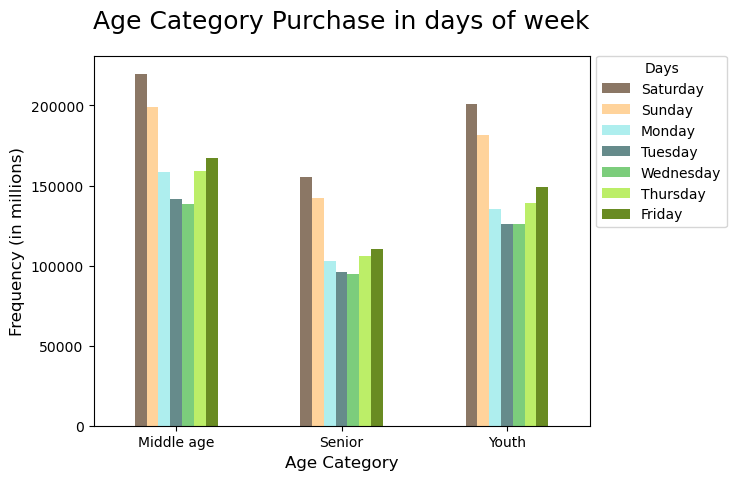

In [85]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['#8B7765', '#FFD39B', '#AEEEEE', '#668B8B', '#7CCD7C','#BCEE68', '#698B22'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Age Category Purchase in days of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

**Chart Observation:** Saturday is the busiest day and Wednsday is the slowest day in a week within the age categories' in terms of orders. The trend of ordering in a week follows the same behaviors for three age categories.

In [86]:
crosstab_vegetarian = pd.crosstab(cstmrs['region'], cstmrs['vegetarian'], dropna = False)
crosstab_vegetarian

vegetarian,No,Yes
region,,
Midwest,37764,672480
Northeast,30895,517381
South,54141,959409
West,43056,733539


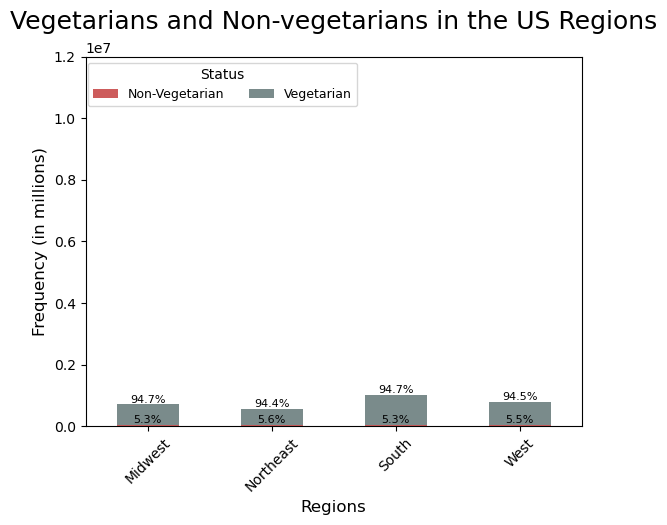

In [87]:
# Plotting the stacked bar

bar_region_veg = crosstab_vegetarian.plot(kind = 'bar', stacked = True, color =['#CD5C5C', '#7A8B8B'])
bar_region_veg.legend(title='Status', bbox_to_anchor=(0.56, 1.0), loc='upper right', ncol = 2, labels=['Non-Vegetarian', 'Vegetarian'], fontsize = 9)
plt.title('Vegetarians and Non-vegetarians in the US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the stacked bar chart

# Get the total for each row
total = crosstab_vegetarian.sum(axis=1)

# Calculate the percent for each row
per = crosstab_vegetarian.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_region_veg.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c, per[(label)])]
    
    # Add the annotation
    bar_region_veg.bar_label(c, labels=labels, label_type='edge', fontsize = 8)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 12000000)


**Chart Observation:** Meat lovers are only less than 5% of customers in all the US regions. This means over 95% of customers purchase their meat/fish needs from other providers rather than Instacart or they are not interested in buying meat/fish/deli products. All the regions in the US present almost the same proportion.

In [88]:
# Creating order_time_habit and region connection

ct_habit = pd.crosstab(cstmrs['region'], cstmrs['order_time_habit'], dropna = False)
ct_habit

order_time_habit,Early bird,Night owl,Regular
region,,,
Midwest,65223,10213,634808
Northeast,53098,7739,487439
South,94899,14209,904442
West,71875,11019,693701


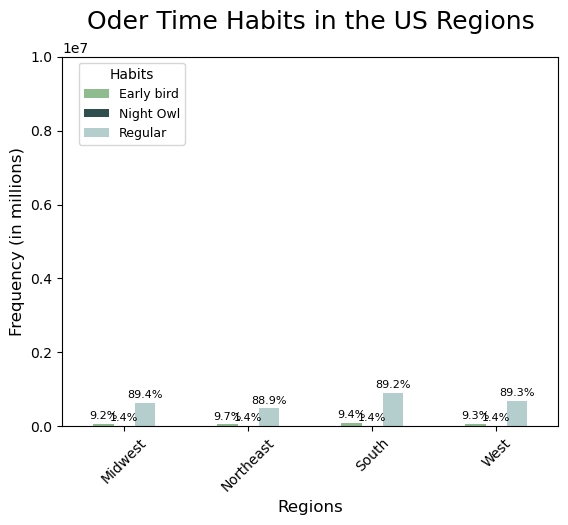

In [89]:
# Plotting the stacked bar

bar_hbt_rgn = ct_habit.plot(kind = 'bar', stacked = False, color =['#8FBC8F', '#2F4F4F','#B4CDCD'])
bar_hbt_rgn.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Oder Time Habits in the US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

# Get the total for each row
total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_rgn.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_hbt_rgn.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)


**Chart Observation:** We can observe the same behavior for all the four regions here as well. Around 90% of orders came through regular customers, ~9% of orders have been submitted in early birds and less than 2% has been made by night owl customers.

In [90]:
ct_hbt_dept = pd.crosstab(cstmrs['department'], cstmrs['order_time_habit'], dropna = False)
ct_hbt_dept

order_time_habit,Early bird,Night owl,Regular
department,,,
alcohol,775,104,12948
babies,4761,450,34172
bakery,10765,1477,99347
beverages,22346,3613,225313
breakfast,6790,880,58888
bulk,315,35,3068
canned goods,8577,1466,88948
dairy eggs,50695,6779,449684
deli,8828,1403,89583


(-1.0, 22.0)

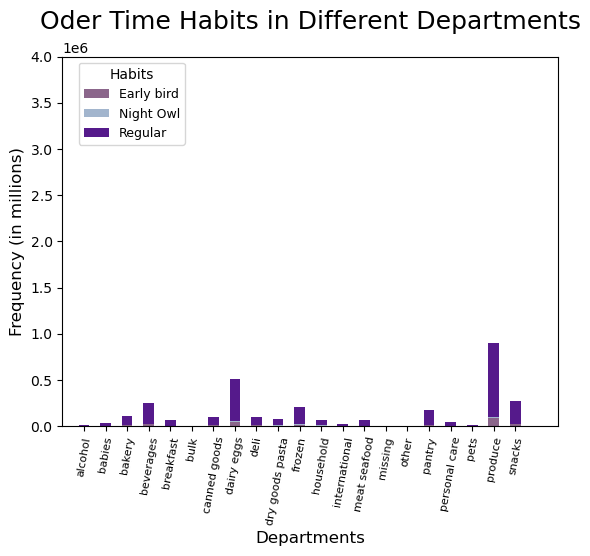

In [91]:
# Plotting the stacked bar

bar_hbt_dept = ct_hbt_dept.plot(kind = 'bar', stacked = True, color =['#8B668B','#A2B5CD','#551A8B'])
bar_hbt_dept.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Oder Time Habits in Different Departments', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Set the y axis limit to increase the axis length
plt.ylim(0, 4000000)
plt.xlim(-1, 22)

**Chart Observation:** Over 90% of orders for almost all the departments have been submitted by regular customers. Personal care and snacks have the highest number of orders in Instacart.

In [92]:
ct_bybs = pd.crosstab(cstmrs['region'], cstmrs['parents_with_baby'], dropna = False)

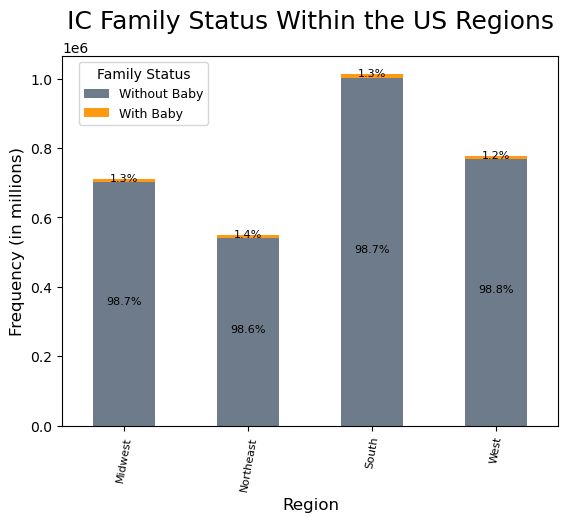

In [93]:
bar_bybs = ct_bybs.plot(kind = 'bar', stacked = True, color= ['#6E7B8B', '#FF9912'])
bar_bybs.legend(title='Family Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Without Baby', 'With Baby'], fontsize = 9)
plt.title('IC Family Status Within the US Regions', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_bybs.sum(axis=1)

# Calculate the percent for each row
per = ct_bybs.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_bybs.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_bybs.bar_label(c, labels=labels, label_type='center', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  


#### **Chart Observation:**
Over 97% of families don't have a baby. This could lead to the targeted promotions and marketing campaigns. 

### 9. Exporting updated dataframes and charts

#### 9.1 Exporting dataframes

In [94]:
#Export low_activity_cxs in .pkl format

low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

In [95]:
#Export high_activity_cxs in .pkl format

cstmrs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cx_profiling.pkl'))

#### 9.2 Exporting charts

In [96]:
# Exporting alcohol_drinker distribution pie chart in .png format

alcohol_drinker_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_drinker_pie.png'), bbox_inches='tight')

In [97]:
# Exporting pet_owner distribution pie chart in .png format

pet_owner_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_pie.png'), bbox_inches='tight')

In [98]:
# Exporting order_time_habit distribution bar chart in .png format

time_habit_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_habit_bar.png'), bbox_inches='tight')

In [99]:
# Exporting income (in the US regions) bar chart in .png format

bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_inc_reg.png'), bbox_inches='tight')

In [100]:
# Exporting household distribution bar chart in .png format

bar_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_household.png'), bbox_inches='tight')

In [101]:
# Exporting age categories (between IC customers by week) bar chart in .png format

bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_day.png'), bbox_inches='tight')

In [102]:
# Exporting vegetarians (in the US regions) bar chart in .png format

bar_region_veg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_veg.png'), bbox_inches='tight')

In [103]:
# Exporting order_time_habits (in the US regions) bar chart in .png format

bar_hbt_rgn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_rgn.png'), bbox_inches='tight')

In [104]:
# Exporting order_time_habits (by department) bar chart in .png format

bar_hbt_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_dept.png'), bbox_inches='tight')

In [105]:
# Exporting parents_with_babies bar chart in .png format

bar_bybs.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_bybs.png'), bbox_inches='tight')